In [31]:
from functools import cache
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.integrate import solve_ivp

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [167]:
def fun(t, y):
    return [-y[0] * y[1],
            y[0]*y[1] - y[1]]

In [170]:
xran = [0, 1]
yran = [0, 1]
tf = 20
initial_states = [[x, y] 
                  for x in np.linspace(*xran, 7) 
                  for y in np.linspace(*yran, 7)]
sols = [solve_ivp(fun, [0, tf], i, t_eval=np.linspace(0, tf, int(tf*50))) for i in initial_states]

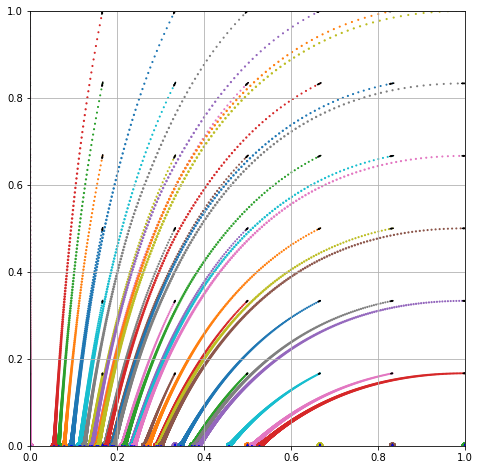

In [172]:
fig = plt.figure(figsize=(8, 8))
arrowlen = 0.01
for s in sols:
    plt.scatter(s.y[0,:], s.y[1,:], s=np.linspace(1, 30, len(s.y[1,:])))
    
for s in sols:
    dx, dy = fun(0, [s.y[0, 0], s.y[1, 0]])
    plt.arrow(s.y[0, 0] - .5*arrowlen*dx, s.y[1, 0] - .5*arrowlen*dy,
              arrowlen*dx, arrowlen*dy, color='black')

for s in sols:
    dx, dy = fun(tf, [s.y[0, -1], s.y[1, -1]])
    plt.arrow(s.y[0, -1] - .5*arrowlen*dx, s.y[1, -1] - .5*arrowlen*dy,
              arrowlen*dx, arrowlen*dy, color='blue')
    
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(xran)
ax.set_ylim(yran)
ax.grid()